In [1]:
import os
import sys
import warnings
import numpy as np 
import scipy.io
import mne
from anlffr.helper import biosemi2mne as bs
from matplotlib import pyplot as plt
from anlffr.preproc import find_blinks
from mne.preprocessing.ssp import compute_proj_epochs

warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi']  = 120

In [2]:
#CHECK, Keep track of these parameters in notebook!
f0 = 103;
tot_harms = 4;
lvl = 80;
phase = 'alt';

from bdf_preproc import poolBDF
pwd = os.getcwd();

subj = 'S311';
cond = 'YNH';
trialID = '*PitchEFR*';
EFR = 1; #change to 1 if you want to look at EFRs, 0 is cortical response

local = 0;

save_preproc = 1;

if local:
    #Local Storage
    measure_dir = '/mnt/20D22780D22758F4/Shared/Code/pitch_tools/Data/FFR/SNAPLab/';
else:
    #Ext Drive
    measure_dir = '/media/sivaprakasaman/AndrewNVME/Pitch_Study/Pitch_Diagnostics_SH_AS/EFR_Pitch/Human/';   
    
    
data_dir = measure_dir+cond+'/'+subj;
out_loc = data_dir+'/EFR_Preprocessed';

os.chdir(data_dir);

refchans = ['EXG1','EXG2'];
# refchans = ['EXG3','EXG4'];

if EFR:
    filtband = [65,4000];
    fs_new = 2*filtband[1];

else:
    filtband = [1,20];
    fs_new = 4e3;

raw, eves, files = poolBDF(trialID, refchans, filtband, fs_new = fs_new)

try:
    os.mkdir('EFR_Preprocessed')
except OSError as error:
    print('Directory Present') 

os.chdir('EFR_Preprocessed');

['S311_PitchEFR_F0103.bdf', 'S311_PitchEFR_F0103+001.bdf', 'S311_PitchEFR_F0103+002.bdf', 'S311_PitchEFR_F0103+003.bdf']
Extracting EDF parameters from /media/sivaprakasaman/AndrewNVME/Pitch_Study/Pitch_Diagnostics_SH_AS/EFR_Pitch/Human/YNH/S311/S311_PitchEFR_F0103.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8724479  =      0.000 ...  1065.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel has a non-zero initial value of 130560 (consider using initial_event=True to detect this event)
2441 events found
Event IDs: [  2   4   6   8  10  12 102 104 106 108 110 112 253]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 65 - 4e+03 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 pas

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    5.0s finished


Resampling to 8000Hz and updating event indices
143502 events found
Event IDs: [    1     2     3     4     5     6     7     8     9    10    11    12
    13    14    15    16    17    18    19    20    21    22    23    24
    25    26    27    28    29    30    31    32    33    34    35    36
    37    38    39    40    41    42    43    44    45    46    47    48
    49    50    51    52    53    54    55    56    57    58    59    60
    61    62    63    64    65    66    67    68    69    70    71    72
    74    76    77    78    79    81    83    84    85    87    88    90
    91    93    94    95    96    98   102   103   104   105   106   107
   109   110   112   113   114   115   116   117   119   121   122   123
   124   125   126   128   130   131   132   133   134   135   136   137
   138   139   140   141   142   143   146   149   150   153   154   156
   157   158   159   163   164   165   168   169   171   174   176   177
   181   182   183   187   189   190   192   

- Lower transition bandwidth: 16.25 Hz (-6 dB cutoff frequency: 56.88 Hz)
- Upper passband edge: 4000.00 Hz
- Upper transition bandwidth: 96.00 Hz (-6 dB cutoff frequency: 4048.00 Hz)
- Filter length: 1665 samples (0.203 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    5.1s finished


Resampling to 8000Hz and updating event indices
143913 events found
Event IDs: [    1     2     3     4     5     6     7     8     9    10    11    12
    13    14    15    16    17    18    19    20    21    22    23    24
    25    26    27    28    29    30    31    32    33    34    35    36
    37    38    39    40    41    42    43    44    45    46    47    48
    49    50    51    52    53    54    55    56    57    58    59    60
    62    63    64    65    66    67    68    69    71    73    74    76
    77    78    81    82    83    84    87    88    90    91    93    94
    95    97    98    99   103   104   105   106   107   110   111   112
   113   114   115   116   119   120   121   122   123   125   127   128
   130   131   132   133   134   135   136   137   138   139   140   141
   142   144   147   148   149   153   154   156   157   161   164   167
   170   171   172   173   174   175   177   178   183   186   188   189
   193   197   198   199   201   202   203   

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    5.1s finished


Resampling to 8000Hz and updating event indices
150392 events found
Event IDs: [    1     2     3     4     5     6     7     8     9    10    11    12
    13    14    15    16    17    18    19    20    21    22    23    24
    25    26    27    28    29    30    31    32    33    34    35    36
    37    38    39    40    41    42    43    44    45    46    47    48
    49    50    51    52    53    54    55    56    57    58    59    60
    61    62    63    64    65    66    67    68    69    70    71    72
    73    74    75    76    77    78    79    81    82    83    84    85
    87    88    89    90    91    92    93    94    95    96    97    98
    99   100   103   104   105   106   107   108   109   110   111   112
   113   114   115   116   117   118   119   120   121   122   123   124
   125   126   127   128   129   130   131   132   133   134   135   136
   137   138   139   140   141   142   143   144   147   148   149   150
   152   153   154   156   157   159   160   

Extracting EDF parameters from /media/sivaprakasaman/AndrewNVME/Pitch_Study/Pitch_Diagnostics_SH_AS/EFR_Pitch/Human/YNH/S311/S311_PitchEFR_F0103+003.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1785855  =      0.000 ...   218.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel has a non-zero initial value of 65024 (consider using initial_event=True to detect this event)
496 events found
Event IDs: [  2   4   6   8  10  12 102 104 106 108 110 112]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 65 - 4e+03 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 65.00
- Lower transition bandwidth: 16.25 Hz (-6 dB cuto

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


Resampling to 8000Hz and updating event indices
27537 events found
Event IDs: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58]


[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    1.0s finished


27296 events found
Event IDs: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58]
Directory Present


In [3]:
from anlffr.preproc import find_blinks
from mne import compute_proj_epochs

if not EFR:
    blinks = find_blinks(raw)
    epochs_blinks = mne.Epochs(raw, blinks, event_id=998, baseline=(-0.25, 0.25),
                               reject=dict(eeg=500e-6), tmin=-0.25, tmax=0.25)

    blink_proj = compute_proj_epochs(epochs_blinks, n_eeg=1)
    raw.add_proj(blink_proj)

In [4]:
bad_chans = ['EXG3','EXG4','EXG5','A4','A14'];
raw.drop_channels(bad_chans);
raw.info

<Info | 10 non-empty values
 bads: 2 items (EXG1, EXG2)
 ch_names: A1, A2, A3, A5, A6, A7, A8, A9, A10, A11, A12, A13, A15, A16, ...
 chs: 32 EEG, 3 misc, 1 Stimulus
 custom_ref_applied: True
 dig: 43 items (3 Cardinal, 34 EEG, 6 Extra)
 highpass: 65.0 Hz
 lowpass: 1667.0 Hz
 meas_date: 2023-09-15 18:02:25 UTC
 nchan: 36
 projs: []
 sfreq: 8000.0 Hz
>

In [5]:
#think about how to make this work for subjects with better/worse channels
efr_chans = ['A5','A26','A9','A22','A31','A32'];
# efr_chans = ['A31','A32'];
fz_chan = ['A31'];
cz_chan = ['A32'];

In [6]:
tbounds = [-0.05,.25];
bsline = (-.05,0);

ranks = [2,4,6,8,10,12];

chan_all_ranks_pos = [];
chan_all_ranks_neg = [];
all_pos_out = [];
all_neg_out = [];

to_proj = bool(~EFR);

for r in ranks:
    all_pos_rank = None;
    all_neg_rank = None;
    
    epochs_rank_pos = mne.Epochs(raw,eves,[r],baseline = bsline, reject = dict(eeg=100e-6),tmin=tbounds[0],tmax=tbounds[1],proj=to_proj, verbose = 'ERROR')
    epochs_rank_neg = mne.Epochs(raw,eves,[r+100],baseline = bsline, reject = dict(eeg=100e-6),tmin=tbounds[0],tmax=tbounds[1],proj=to_proj, verbose = 'ERROR')
    
    #assumes +/- polarities have same EEG cap orientation...should be a fair assumption lol
    chan_names = epochs_rank_pos.ch_names;
    id_efr = mne.pick_channels(chan_names, efr_chans);
    id_fz = mne.pick_channels(chan_names, fz_chan);
    id_cz = mne.pick_channels(chan_names, cz_chan);
                               
    pos = epochs_rank_pos.get_data();
    neg = epochs_rank_neg.get_data();
    
    all_pos_efr = pos[:,id_efr,:];
    all_pos_fz = pos[:,id_fz,:];
    all_pos_cz = pos[:,id_cz,:];
    
    all_neg_efr = neg[:,id_efr,:];
    all_neg_fz = neg[:,id_fz,:];
    all_neg_cz = neg[:,id_cz,:];
    
    if save_preproc and EFR:
            os.chdir(out_loc);
            fname = 'F0_'+str(f0)+'_'+phase+'_rank_'+str(r)+'_tot_harms_'+str(tot_harms)+'_level_'+str(lvl)+'.mat';
            scipy.io.savemat(fname, {'all_pos_cz':all_pos_cz,'all_neg_cz':all_neg_cz,'all_pos_fz':all_pos_fz,
                             'all_neg_fz':all_neg_fz,'all_pos_central':all_pos_efr,'all_neg_central':all_neg_efr,
                             'window':tbounds,'SampleRate':fs_new});
            os.chdir(pwd);
            
            
    pos_avgs = epochs_rank_pos.average();
    neg_avgs = epochs_rank_neg.average();
    
    all_pos_out.append(pos_avgs);
    all_neg_out.append(neg_avgs);

Using data from preloaded Raw for 632 events and 2401 original time points ...
    Rejecting  epoch based on EEG : ['A20', 'A21', 'A24', 'A25', 'A28']
    Rejecting  epoch based on EEG : ['A3']
    Rejecting  epoch based on EEG : ['A1', 'A2', 'A3', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31', 'A32']
    Rejecting  epoch based on EEG : ['A1', 'A2', 'A3', 'A5', 'A6', 'A8', 'A9', 'A10', 'A12', 'A13', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31', 'A32']
    Rejecting  epoch based on EEG : ['A16', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28']
    Rejecting  epoch based on EEG : ['A3', 'A16', 'A20', 'A21', 'A23', 'A24', 'A25', 'A27', 'A28', 'A29', 'A30']
    Rejecting  epoch based on EEG : ['A3', 'A21', 'A24', 'A25', 'A28', 'A30']
    Rejecting  epoch based on EEG : 

    Rejecting  epoch based on EEG : ['A30']
    Rejecting  epoch based on EEG : ['A30']
    Rejecting  epoch based on EEG : ['A30']
    Rejecting  epoch based on EEG : ['A30']
    Rejecting  epoch based on EEG : ['A30']
    Rejecting  epoch based on EEG : ['A30']
    Rejecting  epoch based on EEG : ['A30']
    Rejecting  epoch based on EEG : ['A30']
    Rejecting  epoch based on EEG : ['A30']
    Rejecting  epoch based on EEG : ['A30']
    Rejecting  epoch based on EEG : ['A1', 'A2', 'A3', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31', 'A32']
    Rejecting  epoch based on EEG : ['A1', 'A2', 'A3', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31', 'A32']
    Rejecting  epoch based on EEG : ['A1', 'A2', 'A3', 'A5', 'A6', 'A7', 'A8', 'A9

    Rejecting  epoch based on EEG : ['A3', 'A6', 'A7', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29']
    Rejecting  epoch based on EEG : ['A6']
    Rejecting  epoch based on EEG : ['A7']
    Rejecting  epoch based on EEG : ['A2', 'A3', 'A6', 'A21', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A30']
    Rejecting  epoch based on EEG : ['A30']
    Rejecting  epoch based on EEG : ['A30']
    Rejecting  epoch based on EEG : ['A30']
    Rejecting  epoch based on EEG : ['A30']
    Rejecting  epoch based on EEG : ['A30']
    Rejecting  epoch based on EEG : ['A30']
    Rejecting  epoch based on EEG : ['A1', 'A2', 'A3', 'A6', 'A7', 'A8', 'A23', 'A24', 'A25', 'A27', 'A28', 'A29']
    Rejecting  epoch based on EEG : ['A24']
    Rejecting  epoch based on EEG : ['A1', 'A2', 'A3', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31', 'A32']
    Rejecting  epoch based on EEG : [

    Rejecting  epoch based on EEG : ['A15', 'A16', 'A17', 'A20', 'A21']
    Rejecting  epoch based on EEG : ['A3', 'A6', 'A7', 'A8', 'A10']
    Rejecting  epoch based on EEG : ['A3', 'A6', 'A7']
    Rejecting  epoch based on EEG : ['A3', 'A6', 'A7']
    Rejecting  epoch based on EEG : ['A3', 'A6', 'A7']
    Rejecting  epoch based on EEG : ['A3', 'A6', 'A7']
    Rejecting  epoch based on EEG : ['A6', 'A7', 'A30']
    Rejecting  epoch based on EEG : ['A6', 'A7', 'A30']
    Rejecting  epoch based on EEG : ['A6', 'A7', 'A30']
    Rejecting  epoch based on EEG : ['A1', 'A2', 'A3', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A12', 'A17', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31', 'A32']
    Rejecting  epoch based on EEG : ['A3', 'A6', 'A7', 'A8', 'A10', 'A11', 'A30']
    Rejecting  epoch based on EEG : ['A3', 'A6', 'A7', 'A8']
    Rejecting  epoch based on EEG : ['A3', 'A6', 'A7', 'A30']
    Rejecting  epoch based on EEG : ['A3', 'A6', 'A7']
    Reje

    Rejecting  epoch based on EEG : ['A1', 'A2', 'A3', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31', 'A32']
    Rejecting  epoch based on EEG : ['A1', 'A2', 'A3', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31', 'A32']
    Rejecting  epoch based on EEG : ['A1', 'A2', 'A3', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31', 'A32']
    Rejecting  epoch based on EEG : ['A1', 'A2', 'A3', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31', 'A32']
    Rejecting  epoch based on EEG : ['A1', '

    Rejecting  epoch based on EEG : ['A6', 'A7', 'A21', 'A23', 'A24', 'A25', 'A27', 'A28', 'A30']
    Rejecting  epoch based on EEG : ['A30']
    Rejecting  epoch based on EEG : ['A7']
    Rejecting  epoch based on EEG : ['A30']
    Rejecting  epoch based on EEG : ['A1', 'A2', 'A3', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31', 'A32']
    Rejecting  epoch based on EEG : ['A6', 'A7', 'A11', 'A24', 'A25']
    Rejecting  epoch based on EEG : ['A6', 'A7', 'A10', 'A11', 'A20', 'A21', 'A24']
    Rejecting  epoch based on EEG : ['A6', 'A7', 'A11', 'A20', 'A24']
    Rejecting  epoch based on EEG : ['A7', 'A11', 'A24']
    Rejecting  epoch based on EEG : ['A7', 'A20', 'A24']
    Rejecting  epoch based on EEG : ['A7', 'A11', 'A20', 'A24', 'A25']
    Rejecting  epoch based on EEG : ['A7', 'A11', 'A24']
    Rejecting  epoch based on EEG : ['A7']
    Rejecting  epoch ba

    Rejecting  epoch based on EEG : ['A24']
    Rejecting  epoch based on EEG : ['A3', 'A6', 'A7', 'A10', 'A11', 'A20', 'A24', 'A25', 'A28']
    Rejecting  epoch based on EEG : ['A30']
    Rejecting  epoch based on EEG : ['A15', 'A16']
    Rejecting  epoch based on EEG : ['A6', 'A7']
    Rejecting  epoch based on EEG : ['A7']
    Rejecting  epoch based on EEG : ['A1', 'A7', 'A30']
    Rejecting  epoch based on EEG : ['A6', 'A7']
    Rejecting  epoch based on EEG : ['A6', 'A7']
    Rejecting  epoch based on EEG : ['A7']
    Rejecting  epoch based on EEG : ['A15', 'A16', 'A21', 'A24', 'A28']
    Rejecting  epoch based on EEG : ['A15', 'A16']
    Rejecting  epoch based on EEG : ['A11', 'A15', 'A16']
    Rejecting  epoch based on EEG : ['A1', 'A2', 'A3', 'A5', 'A7', 'A9', 'A13', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31', 'A32']
    Rejecting  epoch based on EEG : ['A1', 'A3', 'A6', 'A11', 'A15', 'A16', 'A17', 'A19'

    Rejecting  epoch based on EEG : ['A1', 'A2', 'A3', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31', 'A32']
    Rejecting  epoch based on EEG : ['A1', 'A2', 'A3', 'A6', 'A7', 'A10', 'A11', 'A17', 'A18', 'A20', 'A21', 'A24', 'A25', 'A28', 'A29', 'A30']
    Rejecting  epoch based on EEG : ['A1', 'A2', 'A3', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31', 'A32']
    Rejecting  epoch based on EEG : ['A30']
    Rejecting  epoch based on EEG : ['A30']
    Rejecting  epoch based on EEG : ['A30']
    Rejecting  epoch based on EEG : ['A30']
    Rejecting  epoch based on EEG : ['A30']
    Rejecting  epoch based on EEG : ['A30']
    Rejecting  epoch based on EEG : ['A30']
    Rejecting  epoch based on EEG : ['A1', 'A2', 'A3', 'A5', 'A6', 'A7

    Rejecting  epoch based on EEG : ['A21', 'A23', 'A24', 'A25', 'A27', 'A28']
    Rejecting  epoch based on EEG : ['A7', 'A24']
    Rejecting  epoch based on EEG : ['A7']
    Rejecting  epoch based on EEG : ['A1', 'A30']
    Rejecting  epoch based on EEG : ['A16', 'A17', 'A20']
    Rejecting  epoch based on EEG : ['A17']
    Rejecting  epoch based on EEG : ['A16', 'A17', 'A18', 'A20']
    Rejecting  epoch based on EEG : ['A16', 'A17']
    Rejecting  epoch based on EEG : ['A3', 'A6', 'A7', 'A8', 'A25', 'A28']
    Rejecting  epoch based on EEG : ['A3', 'A5', 'A6', 'A7', 'A8', 'A10', 'A25', 'A28']
    Rejecting  epoch based on EEG : ['A3', 'A6', 'A7', 'A8', 'A10', 'A30']
    Rejecting  epoch based on EEG : ['A3', 'A6', 'A7', 'A10', 'A25', 'A28']
    Rejecting  epoch based on EEG : ['A3', 'A6', 'A7', 'A15', 'A16', 'A17', 'A20']
    Rejecting  epoch based on EEG : ['A1', 'A2', 'A3', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A15', 'A16', 'A18', 'A19', 'A20', 'A21', 'A22', '

    Rejecting  epoch based on EEG : ['A30']
    Rejecting  epoch based on EEG : ['A30']
    Rejecting  epoch based on EEG : ['A30']
    Rejecting  epoch based on EEG : ['A17']
    Rejecting  epoch based on EEG : ['A16', 'A17', 'A18', 'A20', 'A21', 'A24', 'A25', 'A28', 'A29', 'A30']
    Rejecting  epoch based on EEG : ['A30']
    Rejecting  epoch based on EEG : ['A30']
    Rejecting  epoch based on EEG : ['A30']
    Rejecting  epoch based on EEG : ['A30']
    Rejecting  epoch based on EEG : ['A30']
    Rejecting  epoch based on EEG : ['A30']
    Rejecting  epoch based on EEG : ['A16', 'A17', 'A30']
    Rejecting  epoch based on EEG : ['A17']
    Rejecting  epoch based on EEG : ['A30']
    Rejecting  epoch based on EEG : ['A30']
    Rejecting  epoch based on EEG : ['A30']
    Rejecting  epoch based on EEG : ['A1', 'A2', 'A3', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', '

    Rejecting  epoch based on EEG : ['A1', 'A2', 'A3', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31', 'A32']
    Rejecting  epoch based on EEG : ['A1', 'A2', 'A3', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31', 'A32']
    Rejecting  epoch based on EEG : ['A1', 'A2', 'A3', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31', 'A32']
    Rejecting  epoch based on EEG : ['A1', 'A2', 'A3', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31', 'A32']
    Rejecting  epoch based on EEG : ['A16', 

    Rejecting  epoch based on EEG : ['A3', 'A6', 'A7', 'A10']
    Rejecting  epoch based on EEG : ['A6']
    Rejecting  epoch based on EEG : ['A1', 'A2', 'A3', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31', 'A32']
    Rejecting  epoch based on EEG : ['A30']
    Rejecting  epoch based on EEG : ['A30']
    Rejecting  epoch based on EEG : ['A2', 'A3', 'A5', 'A6', 'A7', 'A8', 'A10', 'A24', 'A25', 'A28']
    Rejecting  epoch based on EEG : ['A1', 'A3', 'A29', 'A30']
    Rejecting  epoch based on EEG : ['A3', 'A6', 'A7', 'A8', 'A10', 'A25']
    Rejecting  epoch based on EEG : ['A3', 'A6', 'A7', 'A8', 'A25', 'A28']
    Rejecting  epoch based on EEG : ['A3', 'A6']
    Rejecting  epoch based on EEG : ['A3', 'A6']
    Rejecting  epoch based on EEG : ['A30']
    Rejecting  epoch based on EEG : ['A7']
    Rejecting  epoch based on EEG : ['A3', 'A6']
    Rejecting  epoch

    Rejecting  epoch based on EEG : ['A1', 'A2', 'A3', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31', 'A32']
    Rejecting  epoch based on EEG : ['A30']
    Rejecting  epoch based on EEG : ['A30']
    Rejecting  epoch based on EEG : ['A30']
    Rejecting  epoch based on EEG : ['A30']
    Rejecting  epoch based on EEG : ['A30']
    Rejecting  epoch based on EEG : ['A30']
    Rejecting  epoch based on EEG : ['A30']
    Rejecting  epoch based on EEG : ['A30']
    Rejecting  epoch based on EEG : ['A30']
    Rejecting  epoch based on EEG : ['A1', 'A2', 'A3', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31', 'A32']
    Rejecting  epoch based on EEG : ['A1', 'A2', 'A3', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A15', 'A16',

    Rejecting  epoch based on EEG : ['A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28']
    Rejecting  epoch based on EEG : ['A20', 'A21', 'A24', 'A25', 'A27', 'A28']
    Rejecting  epoch based on EEG : ['A10', 'A11', 'A12', 'A15', 'A16', 'A17', 'A18', 'A20', 'A24', 'A30']
    Rejecting  epoch based on EEG : ['A17', 'A20']
    Rejecting  epoch based on EEG : ['A16', 'A17', 'A18', 'A29']
    Rejecting  epoch based on EEG : ['A1', 'A2', 'A3', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31', 'A32']
    Rejecting  epoch based on EEG : ['A1', 'A2', 'A3', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31', 'A32']
    Rejecting  epoch based on EEG : ['A3', 'A6', 'A7', 'A25', 'A28']
    Rejecting  epoch based on EEG : ['A1', '

    Rejecting  epoch based on EEG : ['A3', 'A6']
    Rejecting  epoch based on EEG : ['A30']
    Rejecting  epoch based on EEG : ['A3', 'A6', 'A11', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31']
    Rejecting  epoch based on EEG : ['A30']
    Rejecting  epoch based on EEG : ['A1', 'A30']
    Rejecting  epoch based on EEG : ['A1', 'A2', 'A3', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31', 'A32']
    Rejecting  epoch based on EEG : ['A1', 'A2', 'A3', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31', 'A32']
    Rejecting  epoch based on EEG : ['A3', 'A6', 'A7', 'A8', 'A10', 'A25']
    Rejecting  epoch based on EEG : ['A7', 'A24']
    Rejecting  epoch based on EEG :

    Rejecting  epoch based on EEG : ['A30']
    Rejecting  epoch based on EEG : ['A30']
    Rejecting  epoch based on EEG : ['A30']
    Rejecting  epoch based on EEG : ['A30']
    Rejecting  epoch based on EEG : ['A17']
    Rejecting  epoch based on EEG : ['A30']
    Rejecting  epoch based on EEG : ['A30']
    Rejecting  epoch based on EEG : ['A30']
    Rejecting  epoch based on EEG : ['A30']
    Rejecting  epoch based on EEG : ['A30']
    Rejecting  epoch based on EEG : ['A30']
    Rejecting  epoch based on EEG : ['A1', 'A2', 'A3', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31', 'A32']
    Rejecting  epoch based on EEG : ['A1', 'A2', 'A3', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31', 'A32']
    Rejecting  epoch based on EEG : ['

    Rejecting  epoch based on EEG : ['A30']
    Rejecting  epoch based on EEG : ['A30']
    Rejecting  epoch based on EEG : ['A30']
    Rejecting  epoch based on EEG : ['A6', 'A7', 'A17']
    Rejecting  epoch based on EEG : ['A6', 'A7', 'A17']
    Rejecting  epoch based on EEG : ['A6', 'A7', 'A15', 'A16', 'A17']
    Rejecting  epoch based on EEG : ['A15', 'A16', 'A17', 'A30']
    Rejecting  epoch based on EEG : ['A7']
    Rejecting  epoch based on EEG : ['A7', 'A30']
    Rejecting  epoch based on EEG : ['A6']
    Rejecting  epoch based on EEG : ['A6']
    Rejecting  epoch based on EEG : ['A30']
    Rejecting  epoch based on EEG : ['A30']
    Rejecting  epoch based on EEG : ['A30']
    Rejecting  epoch based on EEG : ['A1', 'A3', 'A6', 'A7', 'A10', 'A17', 'A30']
    Rejecting  epoch based on EEG : ['A1', 'A6', 'A30']
    Rejecting  epoch based on EEG : ['A30']
    Rejecting  epoch based on EEG : ['A3', 'A6', 'A21', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30']
    Rejecting  e

    Rejecting  epoch based on EEG : ['A6', 'A25', 'A28']
    Rejecting  epoch based on EEG : ['A28']
    Rejecting  epoch based on EEG : ['A7']
    Rejecting  epoch based on EEG : ['A17', 'A20']
    Rejecting  epoch based on EEG : ['A16', 'A17', 'A18', 'A20']
    Rejecting  epoch based on EEG : ['A16', 'A17']
    Rejecting  epoch based on EEG : ['A3', 'A6', 'A16', 'A17', 'A18', 'A20']
    Rejecting  epoch based on EEG : ['A3', 'A6', 'A7', 'A8', 'A10', 'A20', 'A21', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30']
    Rejecting  epoch based on EEG : ['A2', 'A3', 'A5', 'A6', 'A7', 'A8', 'A10', 'A31']
    Rejecting  epoch based on EEG : ['A3', 'A20', 'A21', 'A24']
    Rejecting  epoch based on EEG : ['A24']
    Rejecting  epoch based on EEG : ['A15', 'A16']
    Rejecting  epoch based on EEG : ['A3', 'A6', 'A7', 'A10', 'A11', 'A15', 'A16', 'A17', 'A18', 'A20', 'A30']
    Rejecting  epoch based on EEG : ['A3', 'A6', 'A7', 'A8', 'A10']
    Rejecting  epoch based on EEG : ['A3', 'A6', 

    Rejecting  epoch based on EEG : ['A1', 'A2', 'A3', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31', 'A32']
    Rejecting  epoch based on EEG : ['A1', 'A2', 'A3', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31', 'A32']
    Rejecting  epoch based on EEG : ['A1', 'A2', 'A3', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31', 'A32']
    Rejecting  epoch based on EEG : ['A20', 'A21', 'A24', 'A25', 'A27', 'A28']
    Rejecting  epoch based on EEG : ['A21', 'A24', 'A25', 'A28', 'A30']
    Rejecting  epoch based on EEG : ['A17', 'A20', 'A21', 'A24', 'A25', 'A27', 'A28', 'A29', 'A30']
    Rejecting  epoch based on EE

    Rejecting  epoch based on EEG : ['A17', 'A30']
    Rejecting  epoch based on EEG : ['A1', 'A2', 'A3', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31', 'A32']
    Rejecting  epoch based on EEG : ['A20', 'A21', 'A23', 'A24', 'A25', 'A27', 'A28']
    Rejecting  epoch based on EEG : ['A19', 'A20', 'A21', 'A23', 'A24', 'A25', 'A27', 'A28']
    Rejecting  epoch based on EEG : ['A1', 'A2', 'A3', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31', 'A32']
    Rejecting  epoch based on EEG : ['A1', 'A2', 'A3', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31', 'A32']
    Rejecting  epoch based on EEG : ['A1', 'A2', 'A3'

    Rejecting  epoch based on EEG : ['A1', 'A2', 'A29', 'A30']
    Rejecting  epoch based on EEG : ['A2', 'A3', 'A6', 'A7', 'A8', 'A10', 'A25', 'A28']
    Rejecting  epoch based on EEG : ['A3', 'A6', 'A7', 'A8', 'A10', 'A25', 'A28']
    Rejecting  epoch based on EEG : ['A3', 'A6', 'A7', 'A8', 'A25', 'A28']
    Rejecting  epoch based on EEG : ['A3', 'A6', 'A7']
    Rejecting  epoch based on EEG : ['A30']
    Rejecting  epoch based on EEG : ['A1', 'A2', 'A3', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31', 'A32']
    Rejecting  epoch based on EEG : ['A3', 'A6', 'A7', 'A8', 'A10', 'A11', 'A20', 'A21', 'A23', 'A24', 'A25', 'A28', 'A29']
    Rejecting  epoch based on EEG : ['A6', 'A7', 'A24', 'A25']
    Rejecting  epoch based on EEG : ['A7', 'A24']
    Rejecting  epoch based on EEG : ['A7', 'A24']
    Rejecting  epoch based on EEG : ['A6']
    Rejecting  epoch bas

    Rejecting  epoch based on EEG : ['A25']
    Rejecting  epoch based on EEG : ['A30']
    Rejecting  epoch based on EEG : ['A30']
    Rejecting  epoch based on EEG : ['A1', 'A2', 'A3', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31', 'A32']
    Rejecting  epoch based on EEG : ['A30']
    Rejecting  epoch based on EEG : ['A30']
    Rejecting  epoch based on EEG : ['A30']
    Rejecting  epoch based on EEG : ['A30']
    Rejecting  epoch based on EEG : ['A30']
    Rejecting  epoch based on EEG : ['A30']
    Rejecting  epoch based on EEG : ['A30']
    Rejecting  epoch based on EEG : ['A30']
    Rejecting  epoch based on EEG : ['A30']
    Rejecting  epoch based on EEG : ['A30']
    Rejecting  epoch based on EEG : ['A30']
    Rejecting  epoch based on EEG : ['A1', 'A3', 'A17', 'A20']
    Rejecting  epoch based on EEG : ['A1', 'A2', 'A3', 'A5', 'A6', 'A7', 'A8', 'A9

    Rejecting  epoch based on EEG : ['A1', 'A2', 'A3', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31', 'A32']
    Rejecting  epoch based on EEG : ['A3', 'A6', 'A7', 'A8', 'A10', 'A25', 'A28']
    Rejecting  epoch based on EEG : ['A1', 'A2', 'A3', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31', 'A32']
    Rejecting  epoch based on EEG : ['A1', 'A2', 'A3', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31', 'A32']
    Rejecting  epoch based on EEG : ['A6', 'A7', 'A24']
    Rejecting  epoch based on EEG : ['A1', 'A2', 'A3', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A15', 'A16', 'A17', 'A18', 'A19

    Rejecting  epoch based on EEG : ['A3', 'A20', 'A21', 'A23', 'A24', 'A25', 'A27', 'A28', 'A29', 'A30']
    Rejecting  epoch based on EEG : ['A1', 'A2', 'A3', 'A6', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31']
    Rejecting  epoch based on EEG : ['A1', 'A3', 'A19', 'A20', 'A21', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28']
    Rejecting  epoch based on EEG : ['A1', 'A2', 'A3', 'A19', 'A20', 'A21', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31']
    Rejecting  epoch based on EEG : ['A1', 'A3', 'A20', 'A21', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30']
    Rejecting  epoch based on EEG : ['A24']
    Rejecting  epoch based on EEG : ['A28']
    Rejecting  epoch based on EEG : ['A1', 'A2', 'A3', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31', 'A32']
    Rejecting  epoch based on E

    Rejecting  epoch based on EEG : ['A30']
    Rejecting  epoch based on EEG : ['A30']
    Rejecting  epoch based on EEG : ['A30']
    Rejecting  epoch based on EEG : ['A30']
    Rejecting  epoch based on EEG : ['A30']
    Rejecting  epoch based on EEG : ['A30']
    Rejecting  epoch based on EEG : ['A30']
    Rejecting  epoch based on EEG : ['A30']
    Rejecting  epoch based on EEG : ['A1', 'A2', 'A3', 'A7', 'A8', 'A9', 'A10', 'A12', 'A13', 'A16', 'A17', 'A19', 'A21', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A31', 'A32']
    Rejecting  epoch based on EEG : ['A1', 'A2', 'A3', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31', 'A32']
    Rejecting  epoch based on EEG : ['A1', 'A2', 'A3', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31',

    Rejecting  epoch based on EEG : ['A1', 'A2', 'A3', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31', 'A32']
    Rejecting  epoch based on EEG : ['A6']
    Rejecting  epoch based on EEG : ['A3', 'A21', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29']
    Rejecting  epoch based on EEG : ['A7', 'A10', 'A11', 'A17', 'A20', 'A21']
    Rejecting  epoch based on EEG : ['A15', 'A16', 'A17', 'A18', 'A20', 'A21', 'A24']
    Rejecting  epoch based on EEG : ['A17']
    Rejecting  epoch based on EEG : ['A16', 'A17']
    Rejecting  epoch based on EEG : ['A17']
    Rejecting  epoch based on EEG : ['A2', 'A3', 'A6', 'A7', 'A8', 'A10']
    Rejecting  epoch based on EEG : ['A3', 'A6', 'A7', 'A8', 'A10', 'A30']
    Rejecting  epoch based on EEG : ['A2', 'A3', 'A5', 'A6', 'A7', 'A8', 'A10']
    Rejecting  epoch based on EEG : ['A3', 'A6', 'A24']
    Rejecting  epoch based on E

    Rejecting  epoch based on EEG : ['A1', 'A2', 'A3', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31', 'A32']
    Rejecting  epoch based on EEG : ['A30']
    Rejecting  epoch based on EEG : ['A1', 'A2', 'A3', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31', 'A32']
    Rejecting  epoch based on EEG : ['A1', 'A2', 'A3', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31', 'A32']
    Rejecting  epoch based on EEG : ['A1', 'A2', 'A3', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31', 'A32']


    Rejecting  epoch based on EEG : ['A1', 'A2', 'A3', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31', 'A32']
    Rejecting  epoch based on EEG : ['A3', 'A6', 'A7', 'A25', 'A28']
    Rejecting  epoch based on EEG : ['A3', 'A6', 'A25']
    Rejecting  epoch based on EEG : ['A6', 'A25']
    Rejecting  epoch based on EEG : ['A3', 'A6']
    Rejecting  epoch based on EEG : ['A1', 'A2', 'A3', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31', 'A32']
    Rejecting  epoch based on EEG : ['A1', 'A2', 'A3', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31', 'A32']
    Rejecting  epoch based on EEG : ['A1', 'A2', 'A3', 'A5'

    Rejecting  epoch based on EEG : ['A6']
    Rejecting  epoch based on EEG : ['A3', 'A6']
    Rejecting  epoch based on EEG : ['A30']
    Rejecting  epoch based on EEG : ['A30']
    Rejecting  epoch based on EEG : ['A30']
    Rejecting  epoch based on EEG : ['A16', 'A17']
    Rejecting  epoch based on EEG : ['A3', 'A6', 'A7', 'A8', 'A10', 'A25', 'A28']
    Rejecting  epoch based on EEG : ['A3', 'A6', 'A7']
    Rejecting  epoch based on EEG : ['A6']
    Rejecting  epoch based on EEG : ['A6']
    Rejecting  epoch based on EEG : ['A11']
    Rejecting  epoch based on EEG : ['A7', 'A11', 'A20']
    Rejecting  epoch based on EEG : ['A7', 'A16', 'A17', 'A24', 'A30']
    Rejecting  epoch based on EEG : ['A3', 'A6', 'A7']
264 bad epochs dropped
Using data from preloaded Raw for 651 events and 2401 original time points ...
    Rejecting  epoch based on EEG : ['A3', 'A6', 'A7', 'A8', 'A28']
    Rejecting  epoch based on EEG : ['A6', 'A7']
    Rejecting  epoch based on EEG : ['A3', 'A11']
    Re

    Rejecting  epoch based on EEG : ['A1', 'A2', 'A3', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31', 'A32']
    Rejecting  epoch based on EEG : ['A30']
    Rejecting  epoch based on EEG : ['A1', 'A2', 'A3', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31', 'A32']
    Rejecting  epoch based on EEG : ['A30']
    Rejecting  epoch based on EEG : ['A30']
    Rejecting  epoch based on EEG : ['A30']
    Rejecting  epoch based on EEG : ['A30']
    Rejecting  epoch based on EEG : ['A30']
    Rejecting  epoch based on EEG : ['A30']
    Rejecting  epoch based on EEG : ['A30']
    Rejecting  epoch based on EEG : ['A30']
    Rejecting  epoch based on EEG : ['A30']
    Rejecting  epoch based on EEG : ['A1', 'A2', 'A3', 'A5', 'A6', 'A7', 'A8', 'A9

    Rejecting  epoch based on EEG : ['A30']
    Rejecting  epoch based on EEG : ['A7']
    Rejecting  epoch based on EEG : ['A1', 'A2', 'A3', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31', 'A32']
    Rejecting  epoch based on EEG : ['A6', 'A7', 'A16', 'A17', 'A18', 'A20', 'A21', 'A24', 'A30']
    Rejecting  epoch based on EEG : ['A6']
    Rejecting  epoch based on EEG : ['A1', 'A2', 'A3', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31', 'A32']
    Rejecting  epoch based on EEG : ['A24', 'A28', 'A30']
    Rejecting  epoch based on EEG : ['A17', 'A30']
    Rejecting  epoch based on EEG : ['A17', 'A20']
    Rejecting  epoch based on EEG : ['A20']
    Rejecting  epoch based on EEG : ['A7']
    Rejecting  epoch based on EEG : ['A7', 'A17

    Rejecting  epoch based on EEG : ['A3', 'A15', 'A24']
    Rejecting  epoch based on EEG : ['A6', 'A21', 'A24', 'A25', 'A27', 'A28']
    Rejecting  epoch based on EEG : ['A30']
    Rejecting  epoch based on EEG : ['A24', 'A25', 'A28']
    Rejecting  epoch based on EEG : ['A24']
    Rejecting  epoch based on EEG : ['A6', 'A7', 'A21', 'A23', 'A24', 'A25', 'A28']
    Rejecting  epoch based on EEG : ['A21', 'A24', 'A25', 'A28']
    Rejecting  epoch based on EEG : ['A30']
    Rejecting  epoch based on EEG : ['A15', 'A16', 'A17']
    Rejecting  epoch based on EEG : ['A1', 'A2', 'A3', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31', 'A32']
    Rejecting  epoch based on EEG : ['A7', 'A30']
    Rejecting  epoch based on EEG : ['A11', 'A15', 'A16', 'A17']
    Rejecting  epoch based on EEG : ['A3', 'A15', 'A28', 'A30']
    Rejecting  epoch based on EEG : ['A15', 'A16',

    Rejecting  epoch based on EEG : ['A30']
    Rejecting  epoch based on EEG : ['A30']
    Rejecting  epoch based on EEG : ['A30']
    Rejecting  epoch based on EEG : ['A30']
    Rejecting  epoch based on EEG : ['A30']
    Rejecting  epoch based on EEG : ['A30']
    Rejecting  epoch based on EEG : ['A30']
    Rejecting  epoch based on EEG : ['A1', 'A2', 'A3', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31', 'A32']
    Rejecting  epoch based on EEG : ['A1', 'A2', 'A3', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31', 'A32']
    Rejecting  epoch based on EEG : ['A1', 'A2', 'A3', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A2

    Rejecting  epoch based on EEG : ['A3', 'A7', 'A16', 'A17', 'A18', 'A20', 'A21', 'A24', 'A29', 'A30']
    Rejecting  epoch based on EEG : ['A3', 'A6', 'A7', 'A8', 'A10', 'A11', 'A12', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21', 'A24', 'A25', 'A28', 'A29']
    Rejecting  epoch based on EEG : ['A1', 'A2', 'A3', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31', 'A32']
    Rejecting  epoch based on EEG : ['A30']
    Rejecting  epoch based on EEG : ['A2', 'A3', 'A5', 'A6', 'A7', 'A10', 'A11', 'A17', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31', 'A32']
    Rejecting  epoch based on EEG : ['A3', 'A6', 'A7', 'A10', 'A11', 'A15', 'A18', 'A19', 'A20', 'A21', 'A23', 'A24', 'A25', 'A28']
    Rejecting  epoch based on EEG : ['A6', 'A7', 'A10', 'A11', 'A20', 'A21', 'A24', 'A25', 'A28']
    Rejecting  epoch based on EEG : [

Text(0.5, 0, 'Time (s)')

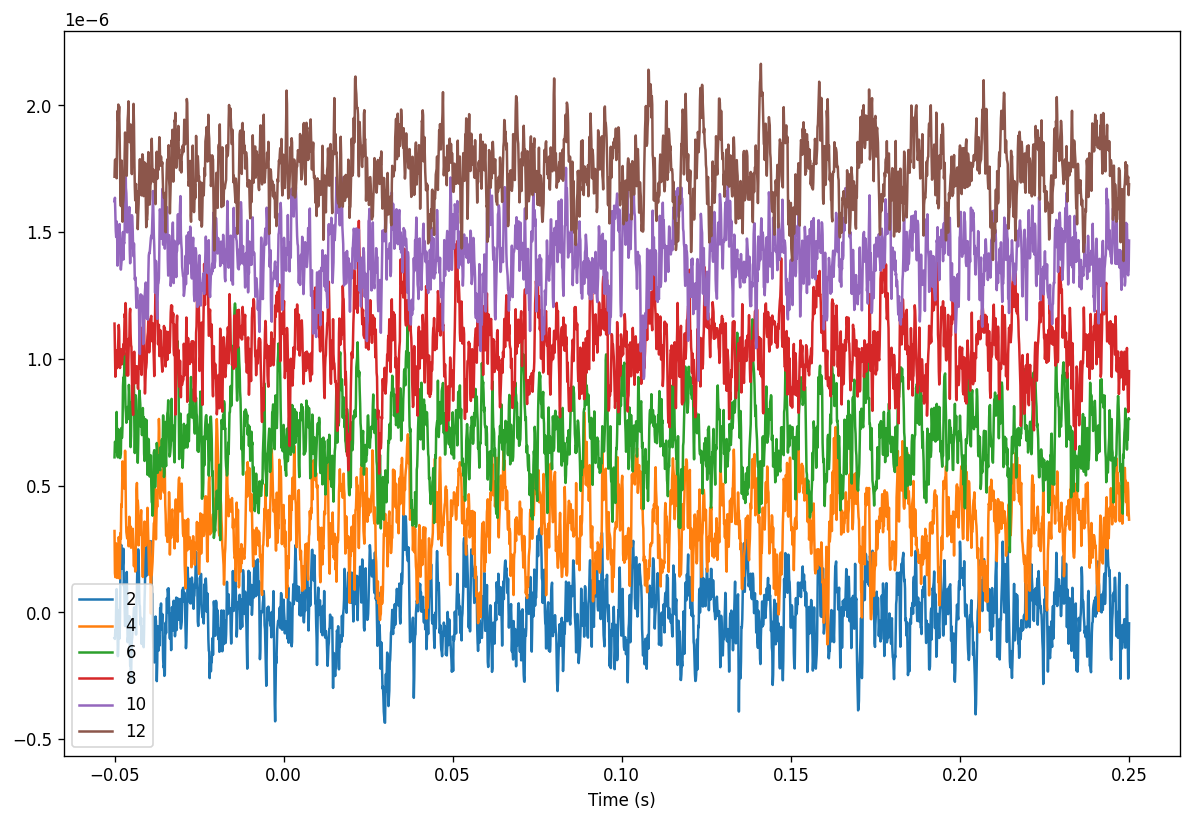

In [7]:
#Plotter
chans_plot = id_cz;
# chans_plot = [16];
t = pos_avgs.times;

for r in range(len(ranks)):
    pos_plt = all_pos_out[r].data[chans_plot,:];
    pos_plt = np.mean(pos_plt,0);
    neg_plt = all_neg_out[r].data[chans_plot,:];
    neg_plt = np.mean(neg_plt,0);
    
    plt.plot(t,(pos_plt+neg_plt)/2 + r*3.5e-7)
    
plt.legend(ranks)
plt.xlabel('Time (s)')

Need more than one channel to make topography for eeg. Disabling interactivity.


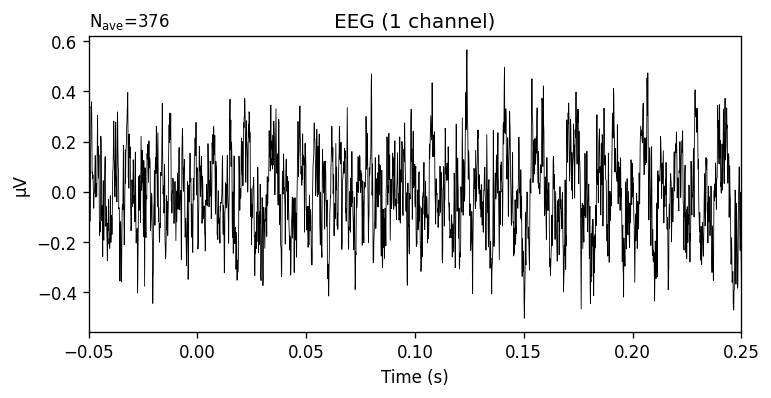

In [8]:
pos_avgs.plot(picks = chans_plot);

<Figure size 1440x960 with 0 Axes>

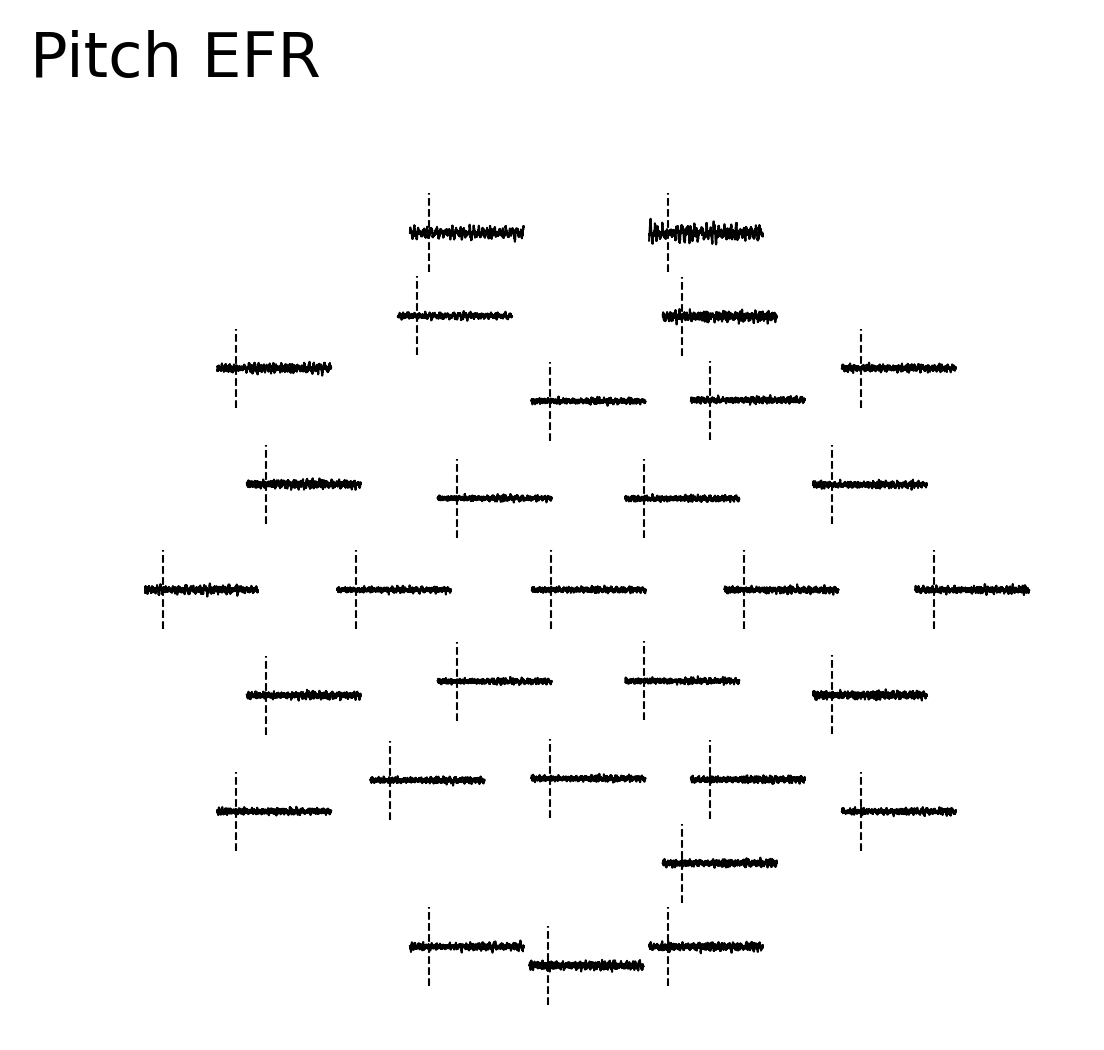

In [9]:
comb = mne.combine_evoked([pos_avgs,neg_avgs],weights = [.5,.5]);

topo_fig = plt.figure();
topo_fig.clear();
plt.rcParams.update({'figure.figsize': (4,4)})
plt.rcParams.update({'lines.linewidth': 1})
topo_fig = plt.figure(dpi = 300)
ax = plt.gca();
topo_fig = comb.plot_topo(ylim = dict(eeg=[-4,4]),legend=False, axes = ax,title = 'Pitch EFR', color = 'black');
#topo_fig2 = neg_avgs.plot_topo(ylim = dict(eeg=[-4,4.]),legend=False, axes = ax, title = 'ACCs', color = 'blue');
topo_fig.show()
plt.show()

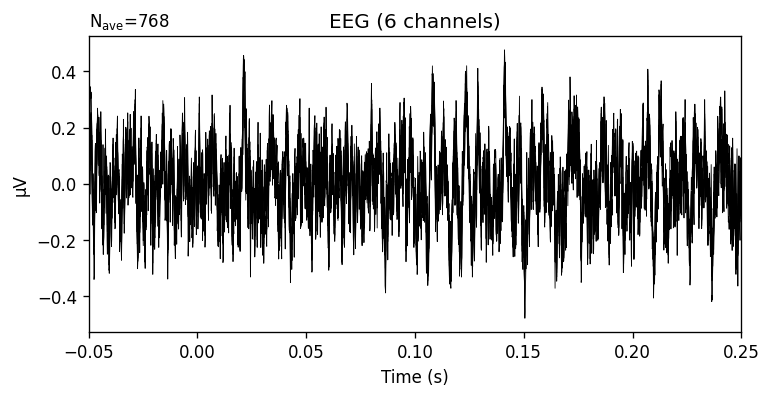

In [10]:
comb.plot(picks = efr_chans);

In [11]:
#ITC Analysis